## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotnine import *

df = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
df.head()


,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
# Standardize the features for visualization
df["age_std"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["chol_std"] = (df["chol"] - df["chol"].mean()) / df["chol"].std()

# Fit Logistic Regression
X = df[['age', 'chol']]
y = df['diagnosis']

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

# Extract coefficients
logistic_age_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][0]
logistic_chol_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][1]
logistic_intercept = logistic_model_fitted.named_steps['logistic'].intercept_

print(f"Logistic Regression Coefficients:")
print(f"Age coefficient: {logistic_age_coef}")
print(f"Cholesterol coefficient: {logistic_chol_coef}")
print(f"Intercept: {logistic_intercept[0]}")


# For age=55: age_std = (55 - mean) / std
age_55_std = (55 - df["age"].mean()) / df["age"].std()
# Solve for chol_std when score = 0
chol_std_boundary = (-logistic_intercept[0] - logistic_age_coef * age_55_std) / logistic_chol_coef
chol_boundary = chol_std_boundary * df["chol"].std() + df["chol"].mean()
print("cholest. threshold: ", chol_boundary)
# print(f"\nFor a 55 year old, cholesterol needs to be > {chol_boundary:.1f} for Disease prediction")

# For 90% probability: score = ln(0.9/0.1) = ln(9) ≈ 2.197
import math
threshold_90 = math.log(9)
chol_std_90 = (threshold_90 - logistic_intercept[0] - logistic_age_coef * age_55_std) / logistic_chol_coef
chol_90 = chol_std_90 * df["chol"].std() + df["chol"].mean()
print("90% pres threshold: ", chol_90)

Logistic Regression Coefficients:
Age coefficient: 0.42746115369956394
Cholesterol coefficient: 0.09597542617159374
Intercept: -0.27025982200075166
cholest. threshold:  368.0852519097803
90% pres threshold:  1585.4904846093718


For a 55 year old, their cholesterol would need to be 368.09 for the doctors to predict heart disease is present.

For the doctors to estimate a 90% chance that heart disease is present, cholestrol would need to be 1585.49 .

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [9]:
# Fit LDA model
X = df[['age', 'chol']]
y = df['diagnosis']

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

# Extract coefficients
lda_age_coef = lda_model_fitted.named_steps['lda'].coef_[0][0]
lda_chol_coef = lda_model_fitted.named_steps['lda'].coef_[0][1]
lda_intercept = lda_model_fitted.named_steps['lda'].intercept_

print(f"LDA Coefficients:")
print(f"Age coefficient: {lda_age_coef}")
print(f"Cholesterol coefficient: {lda_chol_coef}")
print(f"Intercept: {lda_intercept[0]}")

# For a 55 year old, find cholesterol threshold for Disease prediction
age_55_std = (55 - df["age"].mean()) / df["age"].std()
chol_std_boundary_lda = (-lda_intercept[0] - lda_age_coef * age_55_std) / lda_chol_coef
chol_boundary_lda = chol_std_boundary_lda * df["chol"].std() + df["chol"].mean()
print("cholest. threshold: ", chol_boundary_lda)

LDA Coefficients:
Age coefficient: 0.43446581851638433
Cholesterol coefficient: 0.09493491278066939
Intercept: -0.2697356515168511
cholest. threshold:  368.60612890944367


For a 55 year old, their cholesterol would need to be 368.6 for the doctors to predict heart disease is present.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.model_selection import GridSearchCV

X = df[['age', 'chol']]
y = df['diagnosis']

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

print(f"Best C parameter: {svc_pipeline_grid.best_params_}")

# Extract coefficients
svc_age_coef = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

print(f"\nSVC Coefficients:")
print(f"Age coefficient: {svc_age_coef}")
print(f"Cholesterol coefficient: {svc_chol_coef}")
print(f"Intercept: {svc_intercept}")

# For a 55 year old, find cholesterol threshold for Disease prediction
age_55_std = (55 - df["age"].mean()) / df["age"].std()
chol_std_boundary_svc = (-svc_intercept - svc_age_coef * age_55_std) / svc_chol_coef
chol_boundary_svc = chol_std_boundary_svc * df["chol"].std() + df["chol"].mean()
print("cholest boundary: ", chol_boundary_svc)


Best C parameter: {'svc__C': 10}

SVC Coefficients:
Age coefficient: 0.6009556681731195
Cholesterol coefficient: 0.19360163718555645
Intercept: -0.31134523984506396
cholest boundary:  312.96298888040275


For a 55 year old, cholesterol needs to be > 313.0 for Disease prediction


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

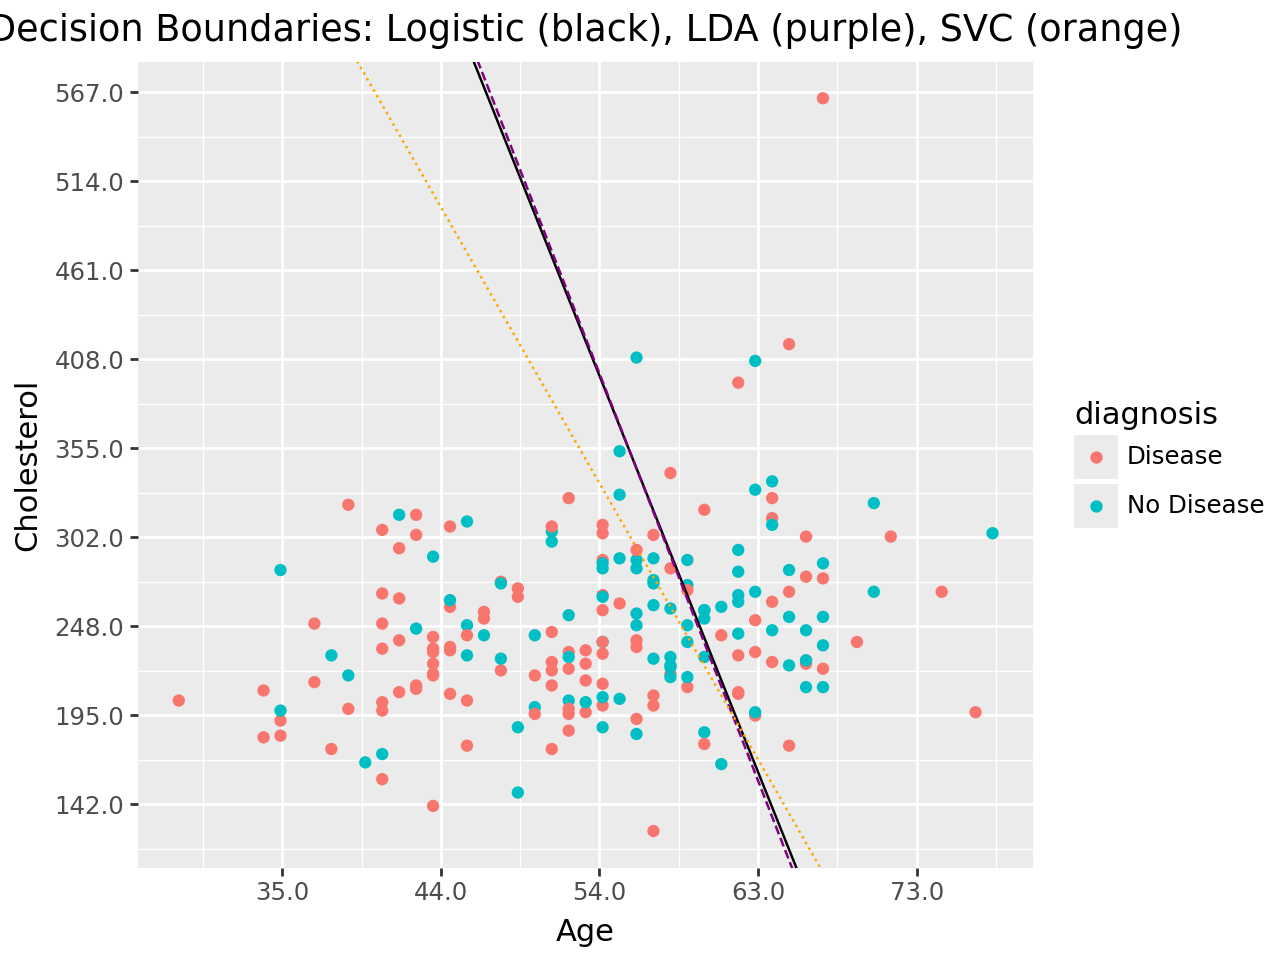

In [5]:
# Compare all three decision boundaries
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "black", linetype="solid")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple", linetype="dashed")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange", linetype="dotted")
+ scale_x_continuous(breaks = np.arange(-2, 3), labels = np.round(df["age"].mean() + df["age"].std() * np.arange(-2, 3), 0))
+ scale_y_continuous(breaks = np.arange(-2, 7), labels = np.round(df["chol"].mean() + df["chol"].std() * np.arange(-2, 7), 0))
+ labs(x = "Age", y = "Cholesterol", title = "Decision Boundaries: Logistic (black), LDA (purple), SVC (orange)")
)